<a href="https://colab.research.google.com/github/arfa544/cs50/blob/main/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Detection



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sn

# Spliting
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import StandardScaler

from scipy.special import softmax

In [ ]:
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, f1_score

In [ ]:
# Configs

#SEED = np.random.randint(100000)
SEED = 11281
NEG_OVER_SAMPLE_RATE = 7.0
TEST_SIZE = 0.2
CLASSIFICATION_THRESHOLD = 0.3

In [ ]:
SEED

11281

## Data Gathering

In [ ]:
df = pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


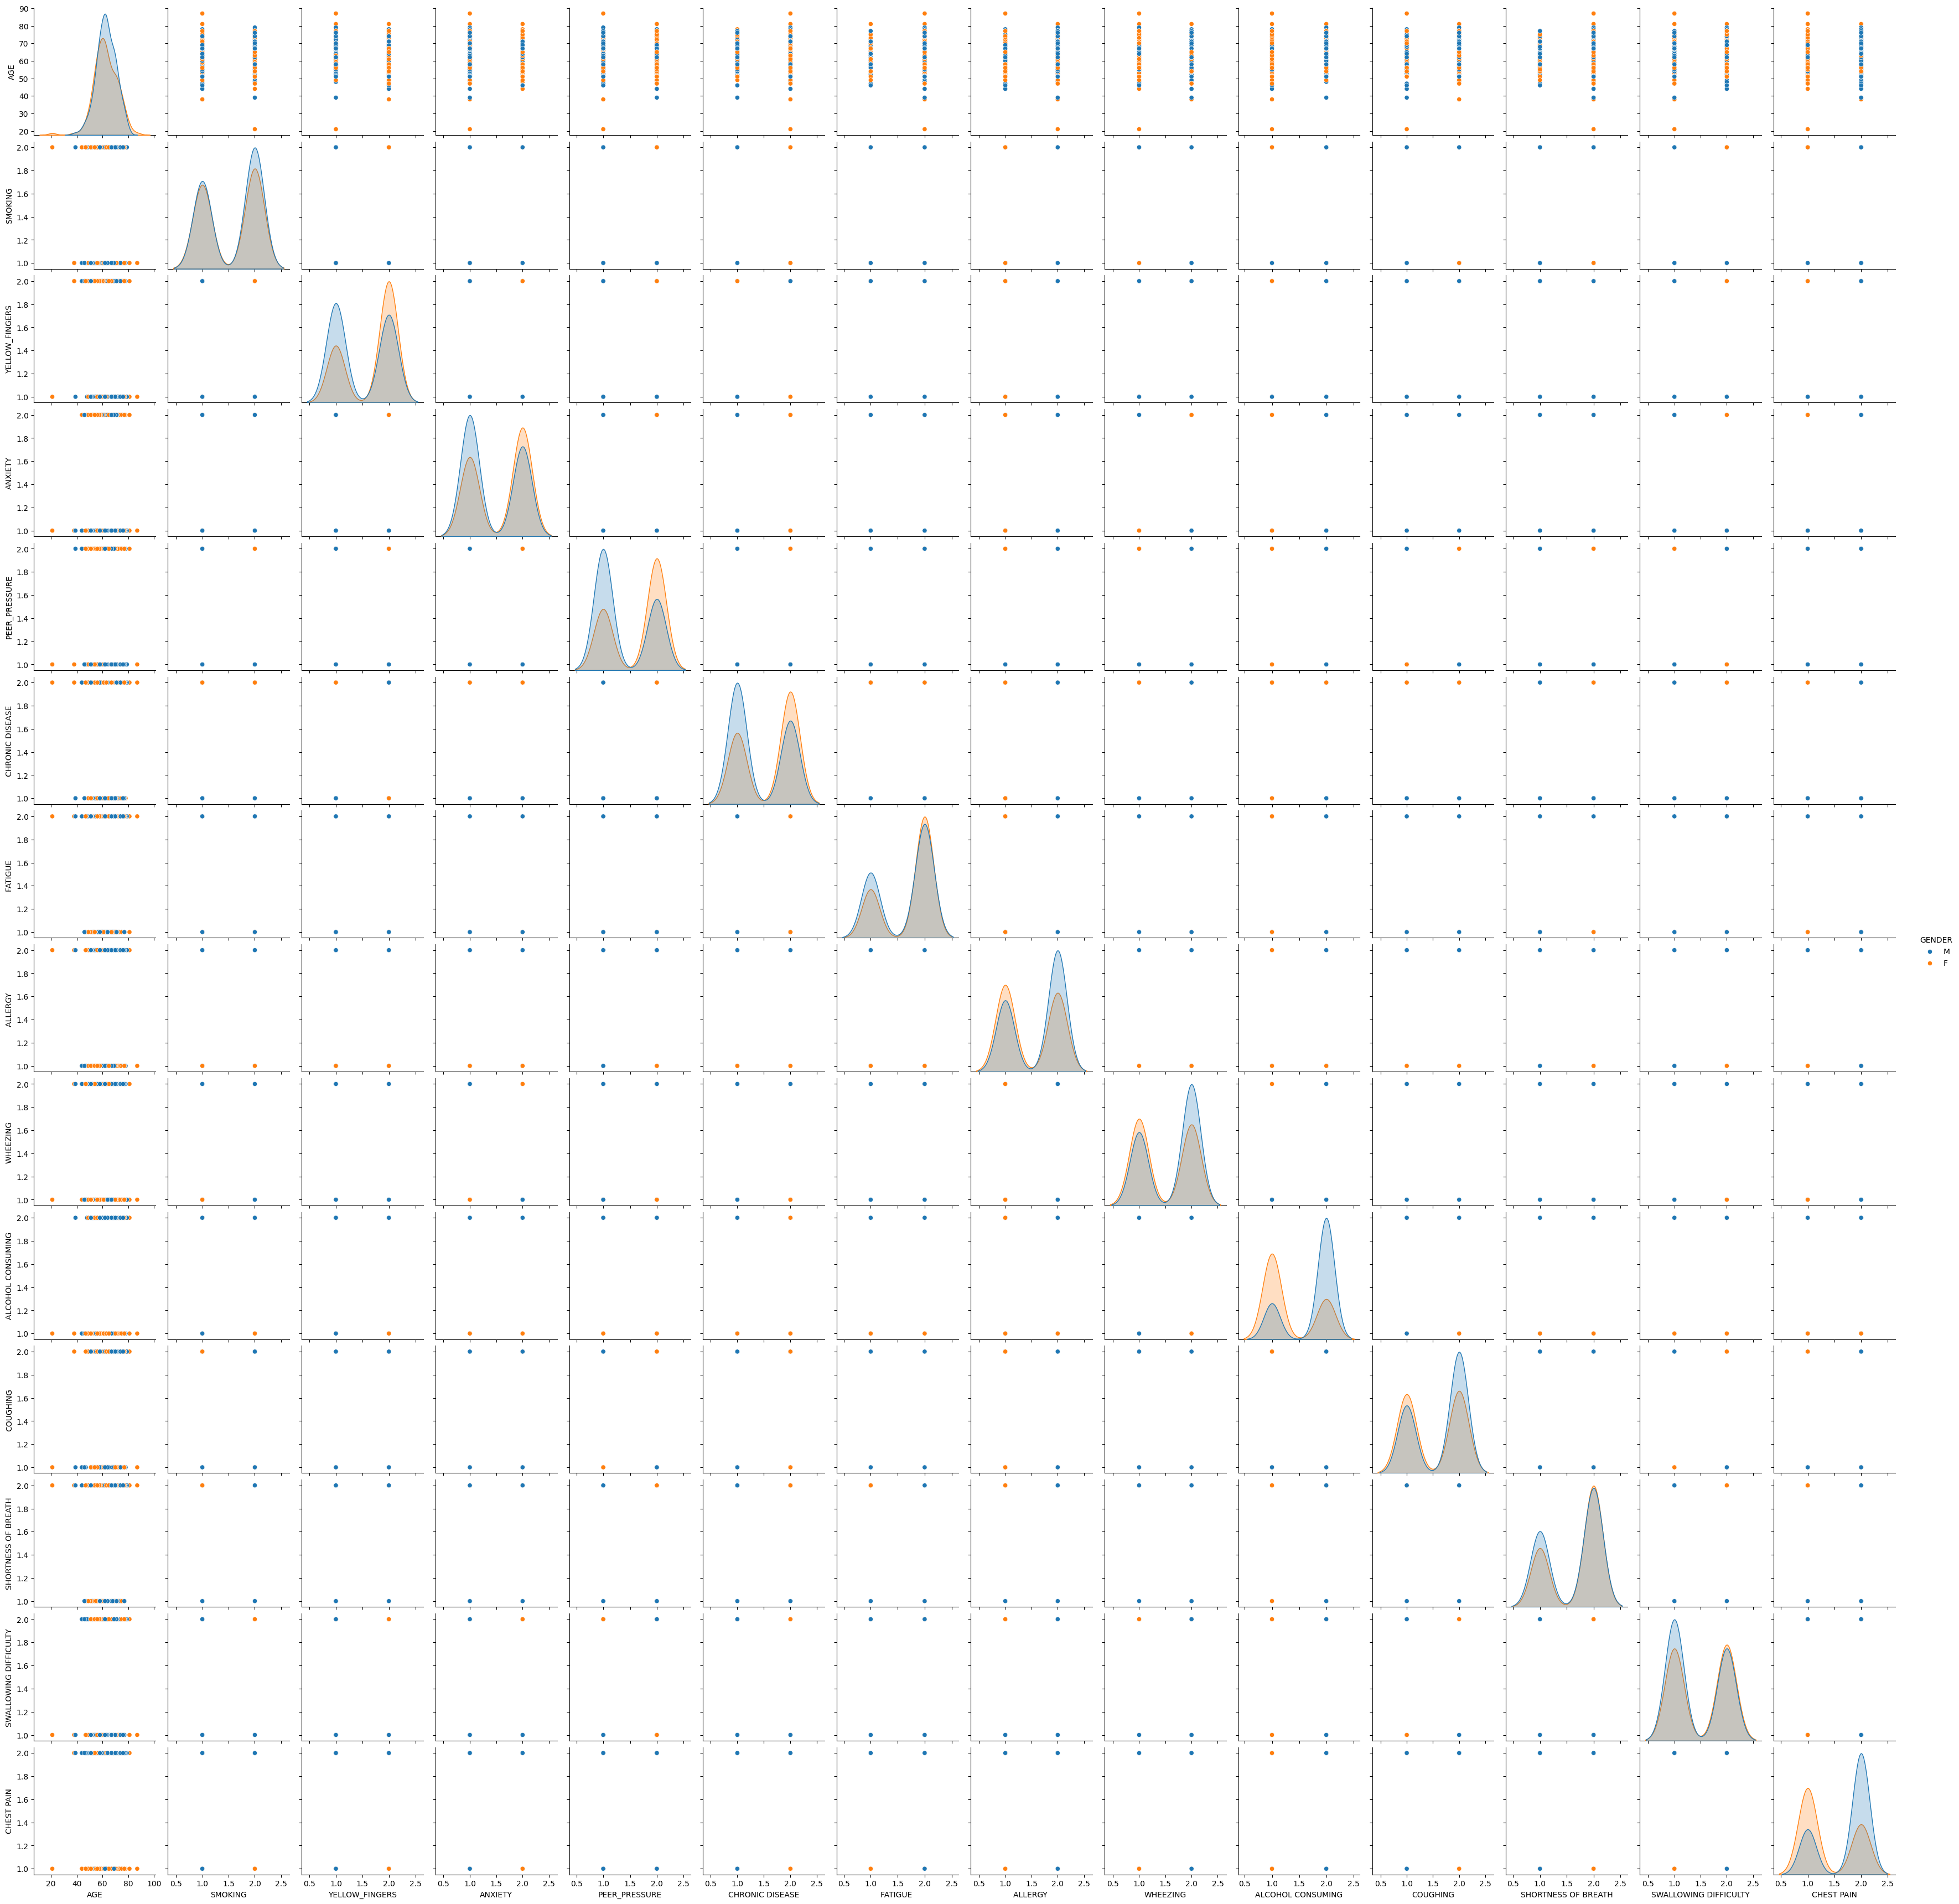

In [ ]:
sn.pairplot(df, hue="GENDER")

## Data Analysis

In [ ]:
# 𝘋𝘳𝘰𝘱𝘪𝘯𝘨 𝘶𝘯𝘸𝘢𝘯𝘵𝘦𝘥 𝘤𝘰𝘭𝘶𝘮𝘯𝘴
# df = df.drop(['GENDER'], axis=1)
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# 𝘊𝘩𝘦𝘤𝘬𝘪𝘯𝘨 𝘧𝘰𝘳 𝘮𝘪𝘴𝘴𝘪𝘯𝘨 𝘷𝘢𝘭𝘶𝘦𝘴
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.dtypes

GENDER                    int64
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [ ]:
#𝘕𝘶𝘮𝘣𝘦𝘳 𝘰𝘧 𝘳𝘰𝘸𝘴 𝘢𝘯𝘥 𝘤𝘰𝘭𝘶𝘮𝘯𝘴
df.shape # 309 datapoints, and 15 Attributes (x + y)

(309, 16)

In [ ]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [ ]:
counts = df['LUNG_CANCER'].value_counts()
counts

1    270
0     39
Name: LUNG_CANCER, dtype: int64

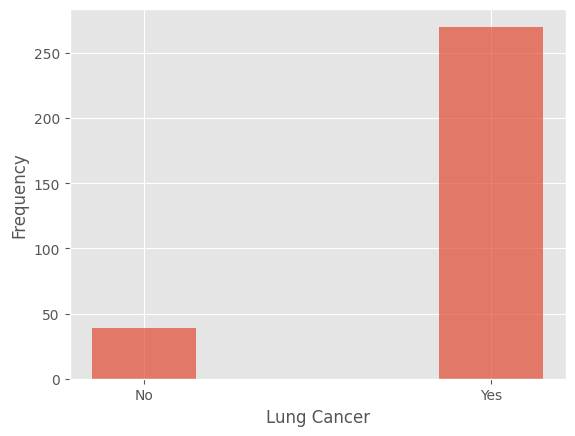

In [ ]:
plt.style.use('ggplot')

def get_freq_plotx(counts, title='Datapoint Frequency'):
  counts = [counts[0], counts[1]]
  fig = plt.figure(figsize=(5, 5))
  plt.bar(["No"], [273], width=0.3, alpha=0.9, label="Oversampled")
  plt.bar(["No", "Yes"], counts, width=0.3, alpha=0.9, label="Orignal Datapoints")
  plt.xlabel('Lung Cancer')
  plt.ylabel('Frequency')
  plt.title(title)
  plt.legend()

def get_freq_plot(counts, title='Datapoint Frequency'):
  counts = [counts[0], counts[1]]
  # fig = plt.figure(figsize=(2.5, 3))
  plt.bar(["No", "Yes"], counts, width=0.3, alpha=0.7)
  plt.xlabel('Lung Cancer')
  plt.ylabel('Frequency')
  plt.title(title)

get_freq_plot(counts=counts, title='')

### Data Balancing : Random Oversampling

In [ ]:
df[df["LUNG_CANCER"] == 0].shape

(39, 16)

In [ ]:
# Selecting negative data.
neg_df = df.query("LUNG_CANCER == 0")

# Random oversampling
oversampled_neg_df = neg_df.sample(frac=NEG_OVER_SAMPLE_RATE, replace=True, random_state=SEED)

oversampled_neg_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
277,1,87,1,1,1,1,2,2,1,1,1,1,2,1,1,0
262,1,67,1,2,1,1,1,1,1,2,1,2,2,1,1,0
37,1,56,1,1,1,1,2,1,1,2,1,1,2,2,1,0
49,0,60,1,1,2,2,2,1,1,1,2,1,1,1,1,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,59,1,1,1,2,1,2,1,2,1,1,2,1,2,0
262,1,67,1,2,1,1,1,1,1,2,1,2,2,1,1,0
154,1,64,2,2,1,2,2,1,1,1,1,1,1,1,1,0
215,1,62,1,1,1,1,2,2,1,1,1,1,2,1,1,0


In [ ]:
# Selecting positive data.
pos_df = df.query("LUNG_CANCER == 1")

pos_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
5,1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
# Merging pos samples, and neg oversampled samples.
balanced_df = pd.concat([pos_df, oversampled_neg_df])

# Shuffling dataframe
balanced_df = balanced_df.sample(frac=1, replace=False, random_state=SEED)

counts = balanced_df['LUNG_CANCER'].value_counts()
counts

0    273
1    270
Name: LUNG_CANCER, dtype: int64

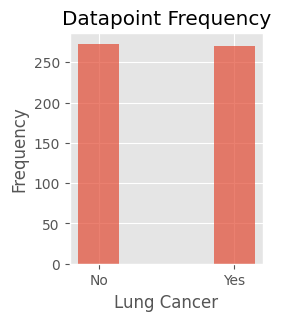

In [ ]:
# Balanced df
get_freq_plot(counts=counts, title='')

## Data set split

In [ ]:
# 𝘚𝘦𝘱𝘦𝘳𝘢𝘵𝘪𝘯𝘨 𝘪𝘯𝘱𝘶𝘵(𝘢𝘴 𝘹) 𝘢𝘯𝘥 𝘰𝘶𝘵𝘱𝘶𝘵(𝘢𝘴 𝘺)
x = balanced_df.iloc[:, :-1].values
x.shape

(543, 15)

In [ ]:
y = balanced_df.iloc[:, -1].values
y.shape

(543,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=SEED)

In [ ]:
x_train.shape, x_test.shape

((434, 15), (109, 15))

In [ ]:
y_train.shape, y_test.shape

((434,), (109,))

In [ ]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

## Data Preprocessing

In [ ]:
# 𝘴𝘤𝘢𝘭𝘦𝘳 𝘪𝘴 𝘵𝘩𝘦 𝘯𝘢𝘮𝘦 𝘰𝘧 𝘰𝘣𝘫𝘦𝘤𝘵
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# 𝘕𝘰𝘳𝘮𝘢𝘭𝘪𝘻𝘦𝘥 𝘵𝘳𝘢𝘪𝘯𝘪𝘯𝘨 𝘥𝘢𝘵𝘢
x_train

array([[-1.00925946,  0.1338921 , -1.1226828 , ..., -1.22239637,
         1.3759845 , -0.94178369],
       [ 0.99082549,  1.42044206, -1.1226828 , ...,  0.81806526,
        -0.72675237, -0.94178369],
       [ 0.99082549, -4.36903275,  0.89072354, ...,  0.81806526,
        -0.72675237, -0.94178369],
       ...,
       [-1.00925946,  0.1338921 ,  0.89072354, ...,  0.81806526,
        -0.72675237, -0.94178369],
       [ 0.99082549, -0.83102037,  0.89072354, ...,  0.81806526,
         1.3759845 , -0.94178369],
       [ 0.99082549, -0.08053289, -1.1226828 , ...,  0.81806526,
        -0.72675237, -0.94178369]])

## Models

### Helper Methods

In [ ]:
# Metric calcs

def calc_metrics(y_true, y_pred, labels=('NO','YES'), title='', display=True):

  # Calc confusion matrix
  cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

  # plot cm
  if display:
    cm_plt = ConfusionMatrixDisplay(cm, display_labels=labels)
    cm_plt.plot()
    plt.title(title)
    plt.show()

  # Report
  report = classification_report(y_true=y_true, y_pred=y_pred)
  if display: print(report)

  # other metrics
  metrics = dict()

  tn, fp, fn, tp = cm.ravel()

  metrics['accuracy'] = accuracy_score(y_true=y_true, y_pred=y_pred)
  metrics['f1_score'] = f1_score(y_true=y_true, y_pred=y_pred)
  metrics["precision"] = tp / (tp+fp)
  metrics["recall"] = tp / (tp+fn)
  metrics["specificity"] = tn / (tn+fp)
  metrics["sensitivity"] = tp / (tp+fn)

  for metric, value in metrics.items():
    if display: print(f"{metric:<20} : {value:.6f}")

  metrics["TN"] = tn
  metrics["FP"] = fp
  metrics["FN"] = fn
  metrics["TP"] = tp

  return metrics



In [ ]:
def train_and_pred(model_name, x_train, y_train, y_test, display=True):

  # Model selection
  if model_name == "GaussianNB":
    model = GaussianNB()

  elif model_name == "SVM":
    model = SVC()

  elif model_name == "KNN":
    model = KNeighborsClassifier(n_neighbors=7)

  elif model_name == "LogisticRegression":
    model = LogisticRegression()

  elif model_name == "XGBClassifier":
    model = XGBClassifier()

  elif model_name == "AdaBoostClassifier":
    model = AdaBoostClassifier()

  elif model_name == "RandomForestClassifier":
    model = RandomForestClassifier()

  elif model_name == "DecisionTreeClassifier":
    model = DecisionTreeClassifier(random_state=SEED)

  else:
    raise Exception(f"Unknown Model name given: {model_name}")

  # Train
  model.fit(x_train, y_train)

  # prediction
  y_pred = model.predict(x_test)

  # Calculate metrics
  metrics = calc_metrics(y_true=y_test, y_pred=y_pred, title=f"{model_name} Model", display=display)

  return model, y_pred, metrics

### 1. Gaussian Naive Bayes

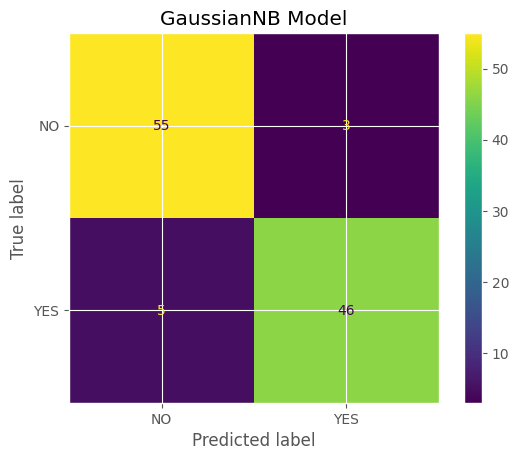

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.94      0.90      0.92        51

    accuracy                           0.93       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.93      0.93      0.93       109

accuracy             : 0.926606
f1_score             : 0.920000
precision            : 0.938776
recall               : 0.901961
specificity          : 0.948276
sensitivity          : 0.901961


In [ ]:
model_name = "GaussianNB"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test,
)

### Support Vector Machine

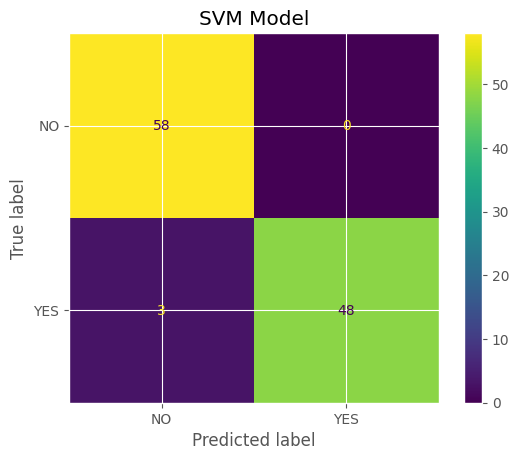

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.94      0.97        51

    accuracy                           0.97       109
   macro avg       0.98      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

accuracy             : 0.972477
f1_score             : 0.969697
precision            : 1.000000
recall               : 0.941176
specificity          : 1.000000
sensitivity          : 0.941176


In [ ]:
model_name = "SVM"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### KNN

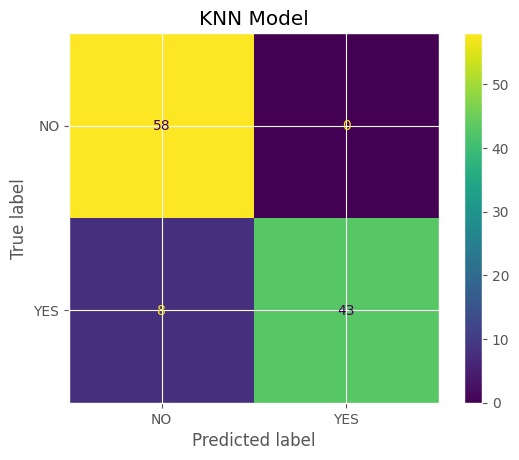

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        58
           1       1.00      0.84      0.91        51

    accuracy                           0.93       109
   macro avg       0.94      0.92      0.93       109
weighted avg       0.94      0.93      0.93       109

accuracy             : 0.926606
f1_score             : 0.914894
precision            : 1.000000
recall               : 0.843137
specificity          : 1.000000
sensitivity          : 0.843137


In [ ]:
model_name = "KNN"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### Logistic Regression

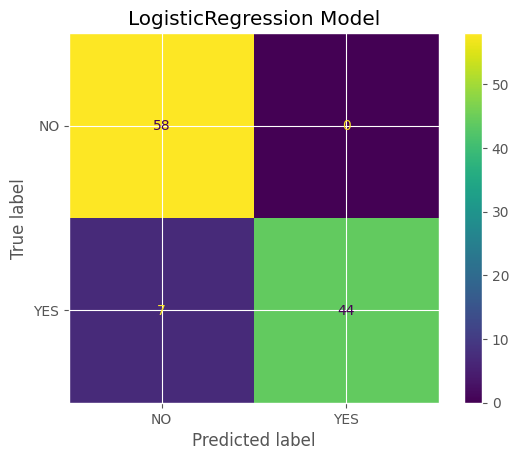

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.86      0.93        51

    accuracy                           0.94       109
   macro avg       0.95      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109

accuracy             : 0.935780
f1_score             : 0.926316
precision            : 1.000000
recall               : 0.862745
specificity          : 1.000000
sensitivity          : 0.862745


In [ ]:
model_name = "LogisticRegression"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### XGBClassifier

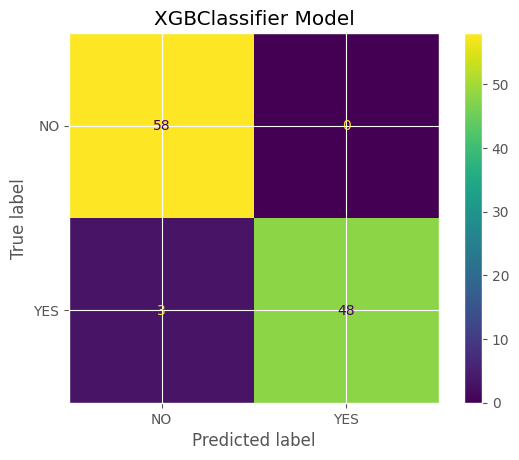

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.94      0.97        51

    accuracy                           0.97       109
   macro avg       0.98      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

accuracy             : 0.972477
f1_score             : 0.969697
precision            : 1.000000
recall               : 0.941176
specificity          : 1.000000
sensitivity          : 0.941176


In [ ]:
model_name = "XGBClassifier"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### AdaBoostClassifier

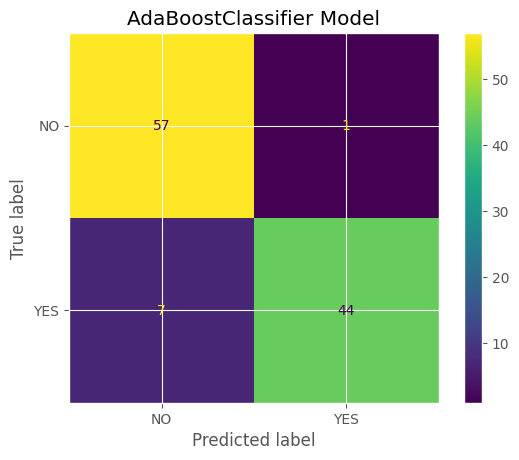

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.98      0.86      0.92        51

    accuracy                           0.93       109
   macro avg       0.93      0.92      0.93       109
weighted avg       0.93      0.93      0.93       109

accuracy             : 0.926606
f1_score             : 0.916667
precision            : 0.977778
recall               : 0.862745
specificity          : 0.982759
sensitivity          : 0.862745


In [ ]:
model_name = "AdaBoostClassifier"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### RandomForestClassifier

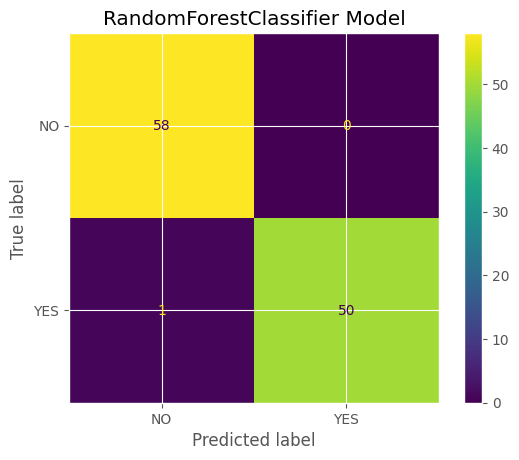

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        51

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

accuracy             : 0.990826
f1_score             : 0.990099
precision            : 1.000000
recall               : 0.980392
specificity          : 1.000000
sensitivity          : 0.980392


In [ ]:
model_name = "RandomForestClassifier"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)

### DecisionTreeClassifier

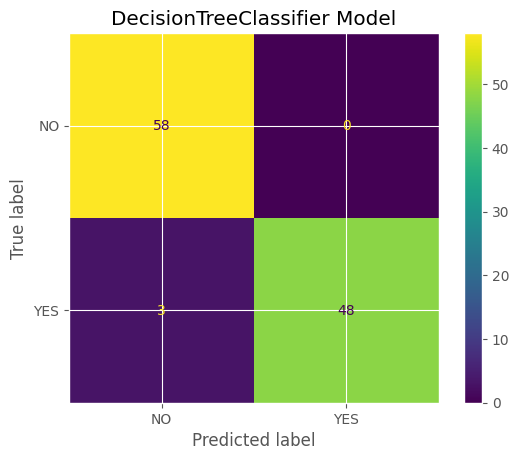

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.94      0.97        51

    accuracy                           0.97       109
   macro avg       0.98      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

accuracy             : 0.972477
f1_score             : 0.969697
precision            : 1.000000
recall               : 0.941176
specificity          : 1.000000
sensitivity          : 0.941176


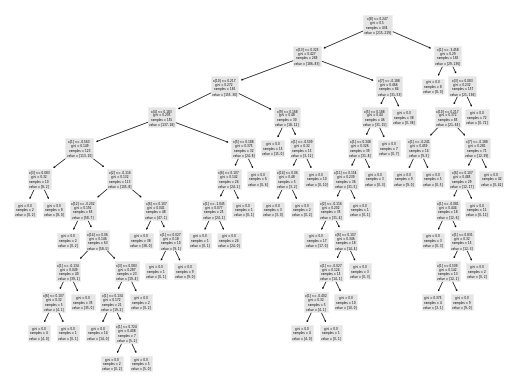

In [ ]:
model_name = "DecisionTreeClassifier"

model, y_pred, metrics = train_and_pred(
    model_name=model_name,
    x_train=x_train,
    y_train=y_train,
    y_test=y_test
)
tree = plot_tree(model)

## Ensemble Model

In [ ]:
# Models for Ensemble

model_dict = {
  "GaussianNB": dict(),
  "SVM": dict(),
  "KNN": dict(),
  "LogisticRegression": dict(),
  "XGBClassifier": dict(),
  "AdaBoostClassifier": dict(),
  # "RandomForestClassifier": dict(),
  "DecisionTreeClassifier": dict(),
}

In [ ]:
# Run all models, and get predictions

for model_name in model_dict.keys():
  print("Running model : ", model_name)

  model, y_pred, metrics = train_and_pred(
      model_name=model_name,
      x_train=x_train,
      y_train=y_train,
      y_test=y_test,
      display=False,
  )

  model_dict[model_name]['accuracy'] = metrics['accuracy']
  model_dict[model_name]['f1_score'] = metrics['f1_score']
  model_dict[model_name]['precision'] = metrics['precision']
  model_dict[model_name]['recall'] = metrics['recall']
  model_dict[model_name]['model'] = model
  model_dict[model_name]['y_pred'] = y_pred


Running model :  GaussianNB
Running model :  SVM
Running model :  KNN
Running model :  LogisticRegression
Running model :  XGBClassifier
Running model :  AdaBoostClassifier
Running model :  DecisionTreeClassifier


In [ ]:
# Generate results DF
pd.set_option("display.precision", 6)

results_df = pd.DataFrame([
    {
        'Model Name': model_name,
        'Accuracy': metrics['accuracy'],
        'F1 Score': metrics["f1_score"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
    }
    for model_name, metrics in model_dict.items()
])

results_df.sort_values('F1 Score', ascending=False, ignore_index=True)

,Model Name,Accuracy,F1 Score,Precision,Recall
0,SVM,0.972477,0.969697,1.000000,0.941176
1,XGBClassifier,0.972477,0.969697,1.000000,0.941176
2,DecisionTreeClassifier,0.972477,0.969697,1.000000,0.941176
3,LogisticRegression,0.935780,0.926316,1.000000,0.862745
4,GaussianNB,0.926606,0.920000,0.938776,0.901961
5,AdaBoostClassifier,0.926606,0.916667,0.977778,0.862745
6,KNN,0.926606,0.914894,1.000000,0.843137


Best model is ?TODO>, with second best as Random Forest




### Ensemble Voting

In [ ]:
# Getting all models

estimators = [
    (model_name, values['model'])
    for model_name, values in model_dict.items()
]
estimators

[('GaussianNB', GaussianNB()),
 ('SVM', SVC()),
 ('KNN', KNeighborsClassifier(n_neighbors=7)),
 ('LogisticRegression', LogisticRegression()),
 ('XGBClassifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('Decisio

In [ ]:
ens_model = VotingClassifier(estimators=estimators, voting='hard', verbose=True)
ens_model.fit(x_train, y_train)

[Voting] ............... (1 of 7) Processing GaussianNB, total=   0.0s
[Voting] ...................... (2 of 7) Processing SVM, total=   0.0s
[Voting] ...................... (3 of 7) Processing KNN, total=   0.0s
[Voting] ....... (4 of 7) Processing LogisticRegression, total=   0.0s
[Voting] ............ (5 of 7) Processing XGBClassifier, total=   0.0s
[Voting] ....... (6 of 7) Processing AdaBoostClassifier, total=   0.1s
[Voting] ... (7 of 7) Processing DecisionTreeClassifier, total=   0.0s


VotingClassifier(estimators=[('GaussianNB', GaussianNB()), ('SVM', SVC()),
                             ('KNN', KNeighborsClassifier(n_neighbors=7)),
                             ('LogisticRegression', LogisticRegression()),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_cat...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('AdaBoostClassifier', AdaBoostClassifier()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(random_state=11281))],
                 verbose=True)

In [ ]:
model_name = "EnsembleVotingModel"

# Predict
y_pred = ens_model.predict(x_test)

# Calc Metrics
metrics = calc_metrics(y_true=y_test, y_pred=y_pred, title=f"{model_name} Model", display=False)

# Update results DF
results_df = results_df.append({
    "Model Name": model_name,
    "Accuracy": metrics['accuracy'],
    "F1 Score": metrics["f1_score"],
    "Precision": metrics["precision"],
    "Recall": metrics["recall"],
}, ignore_index=True)

results_df.sort_values('F1 Score', ascending=False, ignore_index=True)

<ipython-input-71-7265352bf5d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


,Model Name,Accuracy,F1 Score,Precision,Recall
0,SVM,0.972477,0.969697,1.000000,0.941176
1,XGBClassifier,0.972477,0.969697,1.000000,0.941176
2,DecisionTreeClassifier,0.972477,0.969697,1.000000,0.941176
3,EnsembleVotingModel,0.972477,0.969697,1.000000,0.941176
4,LogisticRegression,0.935780,0.926316,1.000000,0.862745
5,GaussianNB,0.926606,0.920000,0.938776,0.901961
6,AdaBoostClassifier,0.926606,0.916667,0.977778,0.862745
7,KNN,0.926606,0.914894,1.000000,0.843137


### Ensemble : weighted Average

In [ ]:
all_y_preds = np.array([
    values['y_pred']
    for model_name, values in model_dict.items()
])

all_y_preds

array([[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# Taking model score (f1_score) as weights

all_weights = np.array([
    values['accuracy']
    for model_name, values in model_dict.items()
])

all_weights

array([0.9266055 , 0.97247706, 0.9266055 , 0.93577982, 0.97247706,
       0.9266055 , 0.97247706])

In [ ]:
# Converting to model probabilites (as model confidence)
all_weights = softmax(all_weights)
all_weights

array([0.13985943, 0.14642442, 0.13985943, 0.14114845, 0.14642442,
       0.13985943, 0.14642442])

In [ ]:
model_dict.keys()

dict_keys(['GaussianNB', 'SVM', 'KNN', 'LogisticRegression', 'XGBClassifier', 'AdaBoostClassifier', 'DecisionTreeClassifier'])

In [ ]:
y_pred = np.sum(all_y_preds * all_weights.reshape(-1, 1), axis=0)
y_pred

array([0.57913269, 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.71371615,
       0.        , 1.        , 1.        , 0.        , 0.71899212,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.13985943, 1.        , 0.71899212, 0.86014057,
       0.        , 0.57385672, 0.43270827, 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.86014057,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.4274323 , 0.        ,
       0.86014057, 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.5725677 , 0.        ,
       0.13985943, 1.        , 1.        , 0.27971886, 1.        ,
       0.        , 0.86014057, 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_pred = np.where(y_pred > CLASSIFICATION_THRESHOLD, 1, 0)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
model_name = "EnsembleWeightedAverageModel"

# Calc Metrics
metrics = calc_metrics(y_true=y_test, y_pred=y_pred, title=f"{model_name} Model", display=False)

# Update results DF
results_df = results_df.append({
    "Model Name": model_name,
    "Accuracy": metrics['accuracy'],
    "F1 Score": metrics["f1_score"],
    "Precision": metrics["precision"],
    "Recall": metrics["recall"],
}, ignore_index=True)

pd.set_option("display.precision", 4)
results_df.sort_values('F1 Score', ascending=False, ignore_index=True)

<ipython-input-82-c8ff4a7605f9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


,Model Name,Accuracy,F1 Score,Precision,Recall
0,EnsembleWeightedAverageModel,0.9908,0.9901,1.0000,0.9804
1,SVM,0.9725,0.9697,1.0000,0.9412
2,XGBClassifier,0.9725,0.9697,1.0000,0.9412
3,DecisionTreeClassifier,0.9725,0.9697,1.0000,0.9412
4,EnsembleVotingModel,0.9725,0.9697,1.0000,0.9412
5,LogisticRegression,0.9358,0.9263,1.0000,0.8627
6,GaussianNB,0.9266,0.9200,0.9388,0.9020
7,AdaBoostClassifier,0.9266,0.9167,0.9778,0.8627
8,KNN,0.9266,0.9149,1.0000,0.8431


## Results Analysis

In [ ]:
sorted_df = results_df.sort_values('F1 Score', ascending=True, ignore_index=True)
sorted_df

,Model Name,Accuracy,F1 Score,Precision,Recall
0,KNN,0.9266,0.9149,1.0000,0.8431
1,AdaBoostClassifier,0.9266,0.9167,0.9778,0.8627
2,GaussianNB,0.9266,0.9200,0.9388,0.9020
3,LogisticRegression,0.9358,0.9263,1.0000,0.8627
4,SVM,0.9725,0.9697,1.0000,0.9412
5,XGBClassifier,0.9725,0.9697,1.0000,0.9412
6,DecisionTreeClassifier,0.9725,0.9697,1.0000,0.9412
7,EnsembleVotingModel,0.9725,0.9697,1.0000,0.9412
8,EnsembleWeightedAverageModel,0.9908,0.9901,1.0000,0.9804


In [ ]:
sorted_df["Model Name"].values

array(['KNN', 'AdaBoostClassifier', 'GaussianNB', 'LogisticRegression',
       'SVM', 'XGBClassifier', 'DecisionTreeClassifier',
       'EnsembleVotingModel', 'EnsembleWeightedAverageModel'],
      dtype=object)

In [ ]:
shortened_names = {
    "KNN": "KNN",
    "AdaBoostClassifier": "AdaBoost",
    "GaussianNB": "GaussianNB",
    "LogisticRegression": "LogisticReg.",
    "SVM": "SVM",
    "XGBClassifier": "XGBoost",
    "DecisionTreeClassifier": "DecisionTree",
    "EnsembleVotingModel": "Ensemble(HV)",
    "EnsembleWeightedAverageModel": "Ensemble(WA)"
}

In [ ]:
sorted_df["Model Name"] = [shortened_names[name] for name in sorted_df["Model Name"].values]
sorted_df["Accuracy"] *= 100
sorted_df["F1 Score"] *= 100
sorted_df["Precision"] *= 100
sorted_df["Recall"] *= 100

pd.set_option("display.precision", 2)
sorted_df

,Model Name,Accuracy,F1 Score,Precision,Recall
0,KNN,92.66,91.49,100.00,84.31
1,AdaBoost,92.66,91.67,97.78,86.27
2,GaussianNB,92.66,92.00,93.88,90.20
3,LogisticReg.,93.58,92.63,100.00,86.27
4,SVM,97.25,96.97,100.00,94.12
5,XGBoost,97.25,96.97,100.00,94.12
6,DecisionTree,97.25,96.97,100.00,94.12
7,Ensemble(HV),97.25,96.97,100.00,94.12
8,Ensemble(WA),99.08,99.01,100.00,98.04


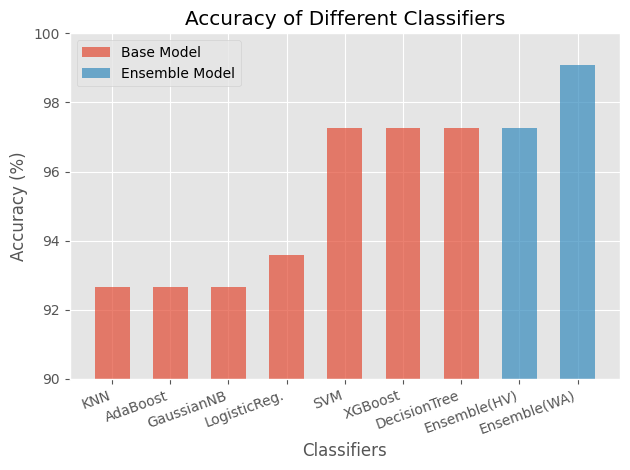

In [ ]:
plt.style.use('ggplot')
# plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

x = sorted_df["Model Name"]
y = sorted_df["Accuracy"]

idx = 7
# Create a bar graph
plt.bar(x[:idx], y[:idx], width=0.6, alpha=0.7, label='Base Model')
plt.bar(x[idx:], y[idx:], width=0.6, alpha=0.7, label='Ensemble Model')
# plt.plot(x, sorted_df["F1 Score"], color='blue', label='F1 Score')
plt.ylim(90, 100)
plt.xticks(rotation=20, ha="right")
# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers')
# Add legend

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend()

# Display the plot
plt.show()